In [10]:
import os
import glob
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def downsample(x, y, win_len=0.1):
    agg_x = pd.DataFrame()
    for center in y['time']:
        window_start = center - win_len/2
        window_end = center + win_len/2
        windowed_signal = x[(x["time"] > window_start) & (x["time"] < window_end)][['accr_x', 'accr_y','accr_z','gyr_x','gyr_y','gyr_z']]
        aggregate_data = windowed_signal.mean().to_frame().T
        aggregate_data['time'] =  center
        agg_x = pd.concat([agg_x, aggregate_data], axis=0)
    
    return pd.concat([agg_x.reset_index(drop=True), y['label']], axis=1)
        

In [3]:
data_root = 'data/TrainingData/'
X_TIME = 'subject_{}_{}__x_time.csv'
X_DATA = 'subject_{}_{}__x.csv'

Y_TIME = 'subject_{}_{}__y_time.csv'
Y_DATA = 'subject_{}_{}__y.csv'

In [4]:
files_x_data = sorted(glob.glob(data_root+X_DATA.format('*', '*')))
files_x_time = sorted(glob.glob(data_root+X_TIME.format('*', '*')))

files_y_data = sorted(glob.glob(data_root+Y_DATA.format('*', '*')))
files_y_time = sorted(glob.glob(data_root+Y_TIME.format('*', '*')))

In [5]:
merged_data = pd.DataFrame()

In [6]:
for i in range(len(files_x_data)):
    y_data = pd.read_csv(files_y_data[i], names=['label'])
    y_time = pd.read_csv(files_y_time[i], names=['time'])

    x_data = pd.read_csv(files_x_data[i], names=['accr_x', 'accr_y','accr_z','gyr_x','gyr_y','gyr_z'])
    x_time = pd.read_csv(files_x_time[i], names=['time'])

    x_data = pd.concat([x_data, x_time], axis=1)
    y_data = pd.concat([y_data, y_time], axis=1)
     
    dwn_smp = downsample(x_data, y_data)
    
    merged_data = pd.concat([merged_data, dwn_smp], axis=0).reset_index(drop=True)

In [7]:
merged_data.to_csv('data/merged_data.csv', index=False)

In [8]:
merged_data

,accr_x,accr_y,accr_z,gyr_x,gyr_y,gyr_z,time,label
0,4.388944,8.316392,2.924182,0.009318,-0.007075,-0.006310,0.02,0
1,4.529269,8.300603,2.864103,0.019093,-0.006738,-0.015814,0.12,0
2,4.384618,8.271196,2.815419,0.005650,-0.005385,0.002084,0.22,0
3,4.292464,8.297531,2.879079,-0.007969,-0.000011,0.030451,0.32,0
4,4.641532,8.214385,2.838722,-0.006726,0.026572,0.034118,0.42,0
...,...,...,...,...,...,...,...,...
335408,2.078699,8.903487,-3.528549,0.000499,-0.001056,0.000869,1203.02,0
335409,2.079810,8.906356,-3.519708,-0.000825,-0.002050,-0.001826,1203.12,0
335410,2.073104,8.901815,-3.510352,-0.001766,0.001342,-0.000325,1203.22,0
335411,2.089679,8.904350,-3.508587,0.001214,0.000920,0.000980,1203.32,0


In [12]:
class_names = {0: "Solid Ground",
               1: "Downstairs",
               2: "Upstairs",
               3: "Grass",
}

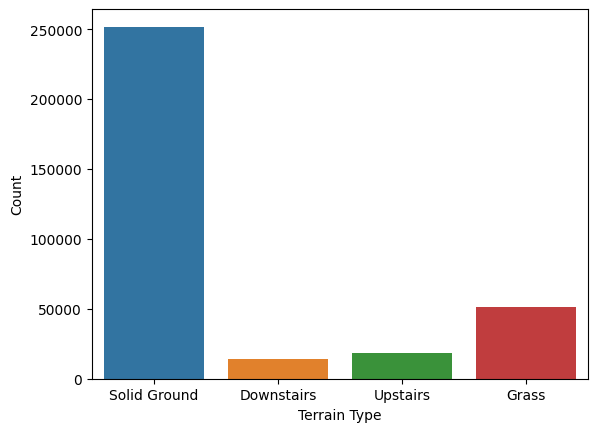

In [21]:
sns.countplot(x='label', data=merged_data)
plt.xticks(ticks=list(class_names.keys()), labels=list(class_names.values()))
plt.xlabel("Terrain Type")
plt.ylabel("Count")
plt.show()